In [5]:
import sys
import mfg_SIRC_functions as py

import matplotlib.pyplot as plt
import numpy as np

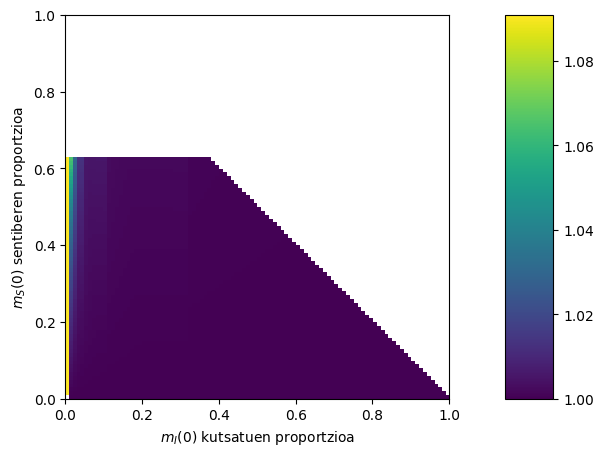

In [6]:
params=py.Parameters()
params.T=10
params.gamma=0.8
params.rho=0.5
params.ci=2/((1-params.rho)**(params.T-1))

fig, axs = plt.subplots(1, 1)
N=100
data=np.zeros((N,N))
for i in range(N):
    for j in range(N-i):
        if i/N<params.rho/params.gamma:
            params.SIR0=(i/N,j/N,N-(i+j)/N)
            cost_OPT = py.compute_OPT_cost(params)[0]
            cost_MFE = py.compute_MFE_cost(params)[0]
            data[i,j]=cost_MFE/cost_OPT if cost_OPT!=0 else 0 #cost_OPT=0 when Mi(0)=Ms(0)=0
        else:
            data[i,j]=0
        
        
data[data == 0] = np.nan
            
img = plt.imshow(data, origin='lower', vmin=1, extent=[0,1,0,1])

plt.xlabel(r'$m_I(0)$ kutsatuen proportzioa')
plt.ylabel(r'$m_S(0)$ sentiberen proportzioa')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)